# Loading the dataset and defining the modeluclar descriptor calculating function

In [62]:
# import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

# Load your dataset
df = pd.read_excel('x5.xlsx')

# Function to calculate molecular descriptors
def calculate_descriptors(SMILES):
    mol = Chem.MolFromSmiles(SMILES)
    if mol is not None:
        descriptors = [Descriptors.MolWt(mol), Descriptors.HeavyAtomCount(mol)]
        return descriptors
    else:
        return [None, None]  # Handle cases where the SMILES cannot be converted to a molecule

# Apply the function to your dataset
df[['MolecularWeight', 'NumHeavyAtoms']] = df['SMILES'].apply(calculate_descriptors).apply(pd.Series)

# Display the first few rows of the updated dataset
#print("First few rows of the dataset with molecular descriptors:")
#print(df.head(10))


# Obtaining the features from the SMILES Column in the dataset

In [63]:
from rdkit import Chem
from rdkit.Chem import Descriptors

# Sample function to calculate molecular descriptors
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        descriptors = [Descriptors.MolWt(mol), Descriptors.HeavyAtomCount(mol)]
        return descriptors
    return [None, None]  # Handle cases where the SMILES cannot be converted to a molecule

# Apply the function to your dataset
df[['MolecularWeight', 'NumHeavyAtoms']] = df['SMILES'].apply(calculate_descriptors).apply(pd.Series)



In [64]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
columns_with_missing_values = missing_values[missing_values > 0].index
print("Columns with missing values:")
print(columns_with_missing_values)

# Handle missing values (if any)
# For simplicity, you can drop rows with missing values
df_cleaned = df.dropna()

# Verify if missing values are handled
print("Missing values after cleaning:")
print(df_cleaned.isnull().sum())


Columns with missing values:
Index([], dtype='object')
Missing values after cleaning:
index                        0
DTXSID                       0
PREFERRED_NAME               0
CASRN                        0
INCHIKEY                     0
IUPAC_NAME                   0
SMILES                       0
INCHI_STRING                 0
MOLECULAR_FORMULA            0
AVERAGE_MASS                 0
MONOISOTOPIC_MASS            0
DATA_SOURCES                 0
NUMBER_OF_PUBMED_ARTICLES    0
PUBCHEM_DATA_SOURCES         0
CPDAT_COUNT                  0
prob_tox21                   0
class_tox21                  0
MolecularWeight              0
NumHeavyAtoms                0
dtype: int64


# Performing the data split into training, validation and test sets 

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_cleaned['PREFERRED_NAME'] = label_encoder.fit_transform(df['PREFERRED_NAME'])

# Define features (X) and target variable (y)
X = df_cleaned[['PREFERRED_NAME','MolecularWeight', 'NumHeavyAtoms']] 
y = df_cleaned['class_tox21']





# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Further split the training data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

# Display the shapes of the resulting sets
print("Shapes of the sets:")
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


Shapes of the sets:
Training set: (3588, 3) (3588,)
Validation set: (897, 3) (897,)
Test set: (1495, 3) (1495,)


# Training the our multi layer perceptron

In [66]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dropout


# Load your dataset
df = pd.read_excel('x5.xlsx')



# Apply the function to your dataset
df[['MolecularWeight', 'NumHeavyAtoms']] = df['SMILES'].apply(calculate_descriptors).apply(pd.Series)

# Display the first few rows of the updated dataset
#print("First few rows of the dataset with molecular descriptors:")
#print(df.head(10))
from sklearn.model_selection import train_test_split


label_encoder = LabelEncoder()
df_cleaned['PREFERRED_NAME'] = label_encoder.fit_transform(df['PREFERRED_NAME'])

# Define features (X) and target variable (y)
X = df_cleaned[['PREFERRED_NAME','MolecularWeight', 'NumHeavyAtoms']] 
y = df_cleaned['class_tox21']





# Split the data into training (80%) and test (20%) sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=32)



# Display the shapes of the resulting sets
print("Shapes of the sets:")
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam

# Create a sequential model
model = Sequential()

# Add input layer with the number of features in your input data
model.add(Dense(32, activation=LeakyReLU(alpha=0.01), input_dim=X_train.shape[1]))
model.add(Dropout(0.5))

# Add hidden layers
model.add(Dense(128, activation=LeakyReLU(alpha=0.01)))
model.add(Dense(64, activation=LeakyReLU(alpha=0.01)))
model.add(Dense(32, activation=LeakyReLU(alpha=0.01)))
model.add(Dense(16, activation=LeakyReLU(alpha=0.01)))

# Add output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))
############################################################
from tensorflow.keras.layers import BatchNormalization

#model.add(BatchNormalization())
##########################################################

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()
# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Shapes of the sets:
Training set: (3588, 3) (3588,)
Validation set: (897, 3) (897,)
Test set: (1495, 3) (1495,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                128       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 128)               4224      
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
        

In [68]:
from sklearn.metrics import precision_score, f1_score


y_pred = model.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred_labels = (y_pred > 0.3).astype(int)

# Calculate precision and F1 score
precision = precision_score(y_test, y_pred_labels)
f1 = f1_score(y_test, y_pred_labels)

# Print test accuracy, precision, and F1 score
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("F1 Score:", f1)




47/47 [==============================] - 0s 994us/step
Test Accuracy: 0.8247491717338562
Precision: 0.43312101910828027
F1 Score: 0.5874730021598273


In [69]:
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.models import load_model
# Save the model in native Keras format
model.save('Carcpred5.keras')




# Applying the model and testing datasets containing some suspicious chemicals of certain market products

In [70]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('Carcpred5.keras')

# Assuming you have new data in the form of a DataFrame 'df2'
df2 = pd.read_excel('vape.xlsx')

# Check if 'SMILES' column exists in the DataFrame
if 'SMILES' in df2.columns:
    # Check and handle missing or non-string values in the 'SMILES' column
   

    # Preprocess the new data similarly to how you preprocessed your training data
    df2[['MolecularWeight', 'NumHeavyAtoms']] = df2['SMILES'].apply(calculate_descriptors).apply(pd.Series)

    # Encode the 'NAME' column
    label_encoder = LabelEncoder()
    df2['NAME2'] = label_encoder.fit_transform(df2['NAME'])

    # Define features for making predictions
    X_new_data = df2[['NAME2', 'MolecularWeight', 'NumHeavyAtoms']]

    # Use the loaded model to get predicted probabilities
    predicted_probabilities = loaded_model.predict(X_new_data)

    # Round the predicted probabilities to obtain binary class labels (0 or 1)
    predictions = predicted_probabilities

    # Create a new column for predictions in the DataFrame
    df2['Predictions'] = predictions

    # Display the DataFrame with predictions
    print(df2[['NAME', 'MolecularWeight', 'NumHeavyAtoms', 'Predictions']])
else:
    print("SMILES column not found in the DataFrame.")






1/1 [==============================] - 0s 70ms/step
                   NAME  MolecularWeight  NumHeavyAtoms  Predictions
0          maltodextrin          342.297           23.0     0.016553
1    disodium inosinate          392.172           25.0     0.008090
2  monosodium glutamate          169.112           11.0     0.166234
3    disodium guanylate          407.187           26.0     0.006506
4         monoglyceride          120.104            8.0     0.285066
5           diglyceride          176.124           12.0     0.149478
6               LACTOSE          342.297           23.0     0.016079
7              DEXTROSE          180.156           12.0     0.139956
8            MALIC ACID          134.087            9.0     0.240810


In [71]:
# Check if 'SMILES' column exists in df2
if 'SMILES' in df2.columns:
    # You need to preprocess the new data similarly to how you preprocessed your training data
    df2[['MolecularWeight', 'NumHeavyAtoms']] = df2['SMILES'].apply(calculate_descriptors).apply(pd.Series)
    
    # Encode the 'PREFERRED_NAME' column
    label_encoder = LabelEncoder()
    df2['NAME2'] = label_encoder.fit_transform(df2['NAME'])

    # Define features for making predictions
    X_new_data = df2[['NAME2', 'MolecularWeight', 'NumHeavyAtoms']]

    # Use the loaded model to get prediction probabilities
    predictions = loaded_model.predict(X_new_data)[:, 0]  # Use [:, 0] instead of [:, 1]

    # Assign labels based on prediction probabilities
    df2['Predictions'] = pd.cut(predictions, bins=[-float('inf'), 0.30, 0.5, float('inf')], labels=['Safe', 'Likely Carcinogenic', 'Carcinogenic'], include_lowest=True)

    # Display the DataFrame with predictions
    print(df2[['NAME', 'MolecularWeight', 'NumHeavyAtoms', 'Predictions']])
else:
    print("SMILES column not found in the DataFrame.")



1/1 [==============================] - 0s 20ms/step
                   NAME  MolecularWeight  NumHeavyAtoms Predictions
0          maltodextrin          342.297           23.0        Safe
1    disodium inosinate          392.172           25.0        Safe
2  monosodium glutamate          169.112           11.0        Safe
3    disodium guanylate          407.187           26.0        Safe
4         monoglyceride          120.104            8.0        Safe
5           diglyceride          176.124           12.0        Safe
6               LACTOSE          342.297           23.0        Safe
7              DEXTROSE          180.156           12.0        Safe
8            MALIC ACID          134.087            9.0        Safe


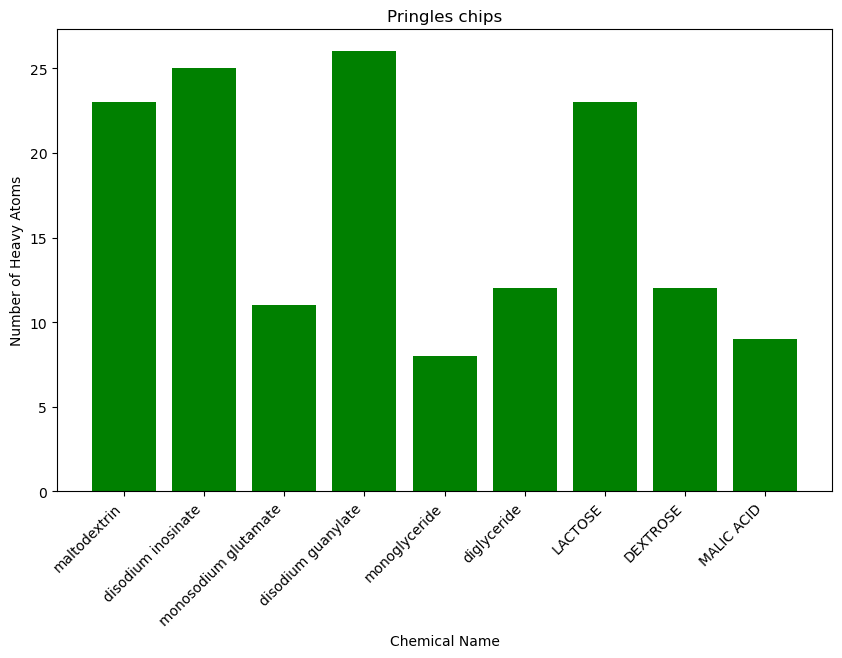

In [72]:
import matplotlib.pyplot as plt


df2['NAME'].fillna('Unknown', inplace=True)


plt.figure(figsize=(10, 6))
colors = {'Safe': 'green', 'Likely Carcinogenic': 'yellow', 'Carcinogenic': 'red'}
df2['Color'] = df2['Predictions'].map(colors)
plt.bar(df2['NAME'], df2['NumHeavyAtoms'], color=df2['Color'])
plt.title('Pringles chips')
plt.xlabel('Chemical Name')
plt.ylabel('Number of Heavy Atoms')
plt.xticks(rotation=45, ha='right')
plt.show()



In [74]:
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

# Assuming 'model' is your trained model and 'X_test', 'y_test' are your test set
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Calculate F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the optimal threshold that maximizes F1 score
optimal_threshold = thresholds[np.argmax(f1_scores)]

# Print the optimal threshold
print("Optimal Threshold for Maximum F1 Score:", optimal_threshold)


47/47 [==============================] - 0s 931us/step
Optimal Threshold for Maximum F1 Score: 0.36366037


47/47 [==============================] - 0s 915us/step


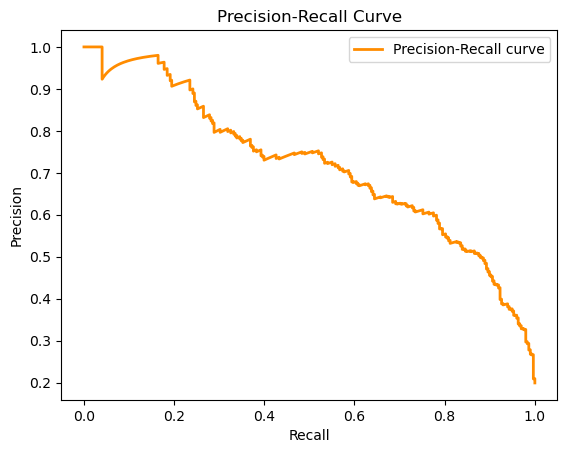

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Assuming 'model' is your trained model and 'X_test', 'y_test' are your test set
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot the precision-recall curve
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


In [77]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming 'model' is your trained model and 'X_test', 'y_test' are your test set
# Make predictions on the test set
y_pred = model.predict(X_test)

# Iterate over different threshold values
for threshold in [0.3, 0.55, 0.6, 0.65, 0.7]:
    y_pred_labels = (y_pred > threshold).astype(int)
    precision = precision_score(y_test, y_pred_labels)
    recall = recall_score(y_test, y_pred_labels)
    f1 = f1_score(y_test, y_pred_labels)
    print(f"Threshold: {threshold:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")


47/47 [==============================] - 0s 1ms/step
Threshold: 0.30, Precision: 0.43, Recall: 0.91, F1 Score: 0.59
Threshold: 0.55, Precision: 1.00, Recall: 0.01, F1 Score: 0.01
Threshold: 0.60, Precision: 0.00, Recall: 0.00, F1 Score: 0.00
Threshold: 0.65, Precision: 0.00, Recall: 0.00, F1 Score: 0.00
Threshold: 0.70, Precision: 0.00, Recall: 0.00, F1 Score: 0.00


C:\Users\huski\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huski\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\huski\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
import pubchempy as pcp

def get_smiles(chemical_name):
    try:
        compound = pcp.get_compounds(chemical_name, 'name', record_type='2d')[0]
        smiles = compound.to_dict(properties=['canonical_smiles'])['canonical_smiles']
        return smiles
    except Exception as e:
        print(f"Error: {e}")
        return None


chemical_name = '-'
smiles_expression = get_smiles(chemical_name)

if smiles_expression:
    print(f"The SMILES expression for {chemical_name} is: {smiles_expression}")
else:
    print(f"Could not find SMILES expression for {chemical_name}")



The SMILES expression for MALIC ACID is: C(C(C(=O)O)O)C(=O)O
